# Historic Ships I

## Apresentação

Esta foi a minha primeira vez usando o Jupyter notebook. Resolvi usar uma base de diários de bordo de navios antigos que encontrei no Kaggle. Mantive comentários (inclusive aqueles de frustração e entusiasmo) e mesmo tentativas malsucedidas, para fins de registro. Este é apenas um notebook de treino. Pretendo continuar trabalhando com essa base para treinar o uso do Python e do Jupyter.

Fonte do Kaggle:
https://www.kaggle.com/code/af11g11/historic-ship-analysis/notebook

## Código

### 1. Base de dados original

In [1]:
import pandas as pd

In [2]:
# apenas testando o jupyter
import os
caminho = os.getcwd()
caminho

'/Users/marianacarvalhoteixeira/Desktop/GitHub/Meu-primeiro-repositorio'

In [3]:
# a primeira tentaiva deu o seguinte erro:
# /var/folders/f_/m75l_76x7wx779ps31w8sxj80000gn/T/ipykernel_85909/3058459067.py:1: DtypeWarning: Columns (5,6,7,8,11,13,18,19,23,24,25,26,28,29,30,34,35,38,43,44,46,73,77,81,82,84,85,87,88,94,96,97,98,99,111,114,116,119,120,122,124,125,127,129,131,133,135,137,140) have mixed types. Specify dtype option on import or set low_memory=False.
# usei low_memory=False e rodou, ainda não sei o que exatamente isso fez, mas a base é beeem grande
base = pd.read_csv('CLIWOC15.csv',low_memory=False)

In [4]:
base.head()

,RecID,InstAbbr,InstName,InstPlace,InstLand,NumberEntry,NameArchiveSet,ArchivePart,Specification,LogbookIdent,...,CargoMemo,ShipAndRig,ShipAndRigMemo,Biology,BiologyMemo,WarsAndFights,WarsAndFightsMemo,Illustrations,TrivialCorrection,OtherRem
0,108,MNM,Archivo Museo Naval Madrid,Madrid,Spain,NaN,NaN,NaN,NaN,"MS. 271, doc 15",...,NaN,0,NaN,0,NaN,0,NaN,0,0,"LA FRAGATA BRETAÑA, DESPUES DE HABER CORRIDO U..."
1,109,MNM,Archivo Museo Naval Madrid,Madrid,Spain,NaN,NaN,NaN,NaN,"MS. 271, doc 16",...,NaN,0,NaN,0,NaN,0,NaN,0,0,TODOS FONDEADOS SE DEDICAN A PONER UNA BATERIA...
2,110,MNM,Archivo Museo Naval Madrid,Madrid,Spain,NaN,NaN,NaN,NaN,"MS. 271, doc 16",...,NaN,0,NaN,0,NaN,0,NaN,0,0,TODOS FONDEADOS SE DEDICAN A PONER UNA BATERIA...
3,111,MNM,Archivo Museo Naval Madrid,Madrid,Spain,NaN,NaN,NaN,NaN,"MS. 271, doc 16",...,NaN,0,NaN,0,NaN,0,NaN,0,0,TODOS FONDEADOS SE DEDICAN A PONER UNA BATERIA...
4,112,MNM,Archivo Museo Naval Madrid,Madrid,Spain,NaN,NaN,NaN,NaN,"MS. 271, doc 16",...,NaN,0,NaN,0,NaN,0,NaN,0,0,TODOS FONDEADOS SE DEDICAN A PONER UNA BATERIA...


In [40]:
# não funcionou muito bem pegar os metadados html
# na página existem duas tabelas e acho que isso criou uma confusão, não consegui criar um dataframe

metadados = pd.read_html('http://webs.ucm.es/info/cliwoc/content/CLIWOC15all.htm')
metadados

[           0      1    2       3  \
 0   Variable  Start  End  Format   
 1         YR      1    4      A4   
 2         MO      5    6      A2   
 3         DY      7    8      A2   
 4         HR      9   12      A4   
 5        LAT     13   17      A5   
 6        LON     18   23      A6   
 7         IM     24   25      A2   
 8       ATTC     26   26      A1   
 9         TI     27   27      A1   
 10        LI     28   28      A1   
 11        DS     29   29      A1   
 12        VS     30   30      A1   
 13       NID     31   32      A2   
 14        II     33   34      A2   
 15        ID     35   43      A9   
 16        C1     44   45      A2   
 17        DI     46   46      A1   
 18         D     47   49      A3   
 19        WI     50   50      A1   
 20         W     51   53      A3   
 21        VI     54   54      A1   
 22        VV     55   56      A2   
 23        WW     57   58      A2   
 24        W1     59   59      A1   
 25       SLP     60   64      A5   
 

In [5]:
# 141 colunas é muito, vou diminuir um pouco
base.shape

(280280, 141)

In [6]:
# fiz esta lista desta forma porque base.columns estava escondendo algumas colunas
# no Kaggle, o autor também notou isso:
# NOTE: I have printed each column instead of using "df.info()" due to the large amount of columns present within the dataset. "df.info" was clipped; hiding some columns.

lista_colunas = []
for i in base.columns:
    lista_colunas.append(i)
lista_colunas

['RecID',
 'InstAbbr',
 'InstName',
 'InstPlace',
 'InstLand',
 'NumberEntry',
 'NameArchiveSet',
 'ArchivePart',
 'Specification',
 'LogbookIdent',
 'LogbookLanguage',
 'EnteredBy',
 'DASnumber',
 'ImageNumber',
 'VoyageFrom',
 'VoyageTo',
 'ShipName',
 'ShipType',
 'Company',
 'OtherShipInformation',
 'Nationality',
 'Name1',
 'Rank1',
 'Name2',
 'Rank2',
 'Name3',
 'Rank3',
 'ZeroMeridian',
 'StartDay',
 'TimeGen',
 'ObsGen',
 'ReferenceCourse',
 'ReferenceWindDirection',
 'DistUnits',
 'DistToLandmarkUnits',
 'DistTravelledUnits',
 'LongitudeUnits',
 'VoyageIni',
 'UnitsOfMeasurement',
 'Calendar',
 'Year',
 'Month',
 'Day',
 'DayOfTheWeek',
 'PartDay',
 'TimeOB',
 'Watch',
 'Glasses',
 'UTC',
 'CMG',
 'ShipSpeed',
 'Distance',
 'drLatDeg',
 'drLatMin',
 'drLatSec',
 'drLatHem',
 'drLongDeg',
 'drLongMin',
 'drLongSec',
 'drLongHem',
 'LatDeg',
 'LatMin',
 'LatSec',
 'LatHem',
 'LongDeg',
 'LongMin',
 'LongSec',
 'LongHem',
 'Lat3',
 'Lon3',
 'LatInd',
 'LonInd',
 'PosCoastal',
 'E

### 2. Base 1: Lat Long

In [10]:
# achei que precisava fazer uma base.copy() e depois a base1, mas do jeito abaixo deu certo sem interferir na base original
# base1 bem simples, apenas com nome, tipo e lat e long.
# lat e long (Lat3 e Lon3) foram escolhidas de acordo com o notebook de exemplo do Kaggle
base1 = base[['ShipName','ShipType','Lat3','Lon3']]
base1

,ShipName,ShipType,Lat3,Lon3
0,LA ORBE,FRAGATA,NaN,NaN
1,SAN CARLOS,PAQUEBOTE,NaN,NaN
2,SAN CARLOS,PAQUEBOTE,NaN,NaN
3,SAN CARLOS,PAQUEBOTE,NaN,NaN
4,SAN CARLOS,PAQUEBOTE,NaN,NaN
...,...,...,...,...
280275,Euryalus,5th Rate,42.7833,-17.5000
280276,Euryalus,5th Rate,41.0833,-16.7500
280277,Euryalus,5th Rate,38.8167,-17.2833
280278,Euryalus,5th Rate,37.6500,-16.7667


In [12]:
# importando seaborn
import seaborn as sns

<AxesSubplot:xlabel='Lon3', ylabel='Lat3'>

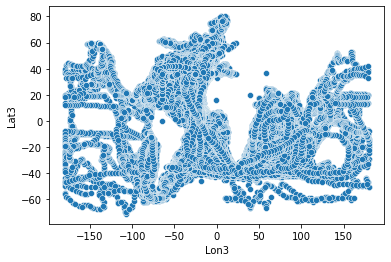

In [13]:
# plotando um gráfico scatter (sem limpar os dados e sem seleções)
# olha que legal que fica! Parece um caminho de traça rs. Dá pra ver certinho os continentes! (e uns pontinhos errados no meio da terra)

sns.scatterplot(data=base1,
                x='Lon3',
                y='Lat3')

In [15]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

#### 2.1.Base 1: navios específicos

In [17]:
base1.ShipName.values()

TypeError: 'numpy.ndarray' object is not callable